In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np
import math
import matplotlib.animation as animation

In [2]:
df=pd.read_csv('HeartDisease.csv')
print(df.head(10))
#printing the number of data sets 
print("No of patient"+ " "+str(len(df.index)))

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   
5   6   32    0   2     105.0  198.0  0.0      0.0    165.0    0.0      0.0   
6   7   32    1   2     110.0  225.0  0.0      0.0    184.0    0.0      0.0   
7   8   32    1   2     125.0  254.0  0.0      0.0    155.0    0.0      0.0   
8   9   33    1   3     120.0  298.0  0.0      0.0    185.0    0.0      0.0   
9  10   34    0   2     130.0  161.0  0.0      0.0    190.0    0.0      0.0   

   num    Place  
0    0  Hungary  
1    0  Hungary  
2    0  Hungary  
3    0  Hungary  
4    0  Hungary  
5    0  Hungary  
6   

Analyzing

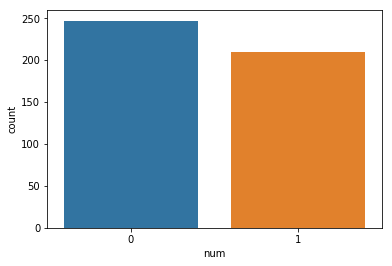

In [3]:
sns.countplot(x="num",data=df)#number of patient survive

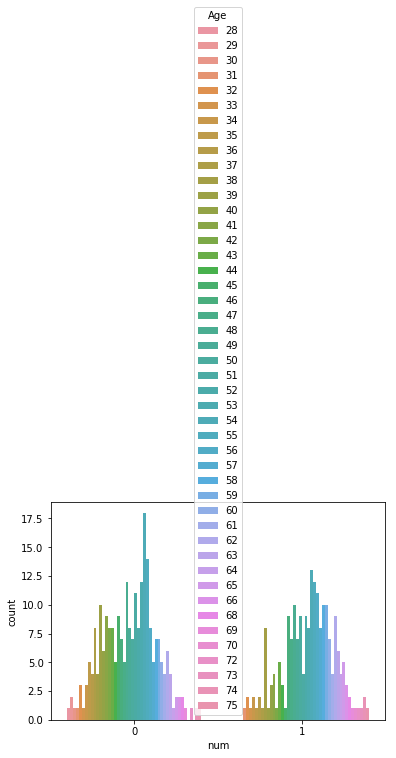

In [4]:
sns.countplot(x="num",hue="Age",data=df)

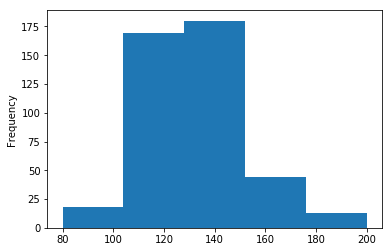

In [5]:
df["trestbps"].plot.hist(by='num',bins=5)

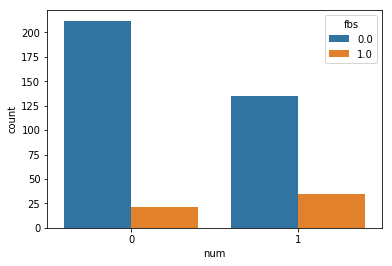

In [6]:
sns.countplot(x="num",hue="fbs",data=df)

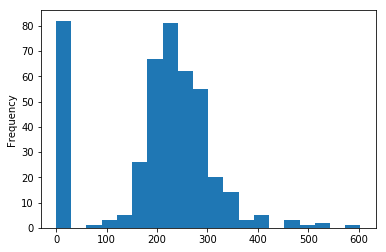

In [7]:
df['chol'].plot.hist(bins=20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
ID          457 non-null int64
Age         457 non-null int64
Sex         457 non-null int64
cp          457 non-null int64
trestbps    424 non-null float64
chol        431 non-null float64
fbs         403 non-null float64
restecg     455 non-null float64
thalach     424 non-null float64
exang       424 non-null float64
oldpeak     421 non-null float64
num         457 non-null int64
Place       457 non-null object
dtypes: float64(7), int64(5), object(1)
memory usage: 46.5+ KB


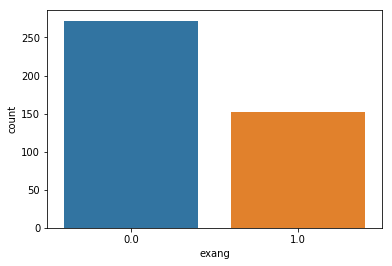

In [9]:
sns.countplot(x="exang",data=df)

Wrangling

In [10]:
df.isnull()#checking if data is nulld

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()#checking how many null are present in the data set

ID           0
Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
Place        0
dtype: int64

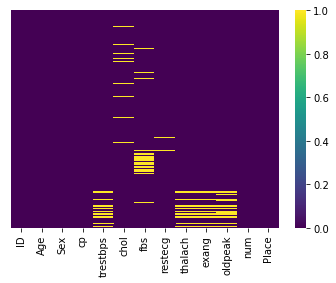

In [12]:
#lets plot heat map to check the null values distribution
sns.heatmap(df.isnull(), yticklabels=False,cmap="viridis")

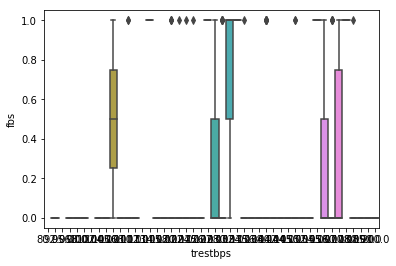

In [13]:
sns.boxplot(x="trestbps",y="fbs",width=1,data=df)

In [14]:
df.head(5)

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,5,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary


In [15]:
df.drop("Place",axis=1,inplace=True)

In [16]:
df.drop("ID",axis=1,inplace=True)
print(df)

     Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  num
0     28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0    0
1     29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0    0
2     29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0    0
3     30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0    0
4     31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0    0
5     32    0   2     105.0  198.0  0.0      0.0    165.0    0.0      0.0    0
6     32    1   2     110.0  225.0  0.0      0.0    184.0    0.0      0.0    0
7     32    1   2     125.0  254.0  0.0      0.0    155.0    0.0      0.0    0
8     33    1   3     120.0  298.0  0.0      0.0    185.0    0.0      0.0    0
9     34    0   2     130.0  161.0  0.0      0.0    190.0    0.0      0.0    0
10    34    1   2     150.0  214.0  0.0      1.0    168.0    0.0      0.0    0
11    34    1   2      98.0  220.0  0.0      0.0    

In [17]:
df.dropna(inplace=True)

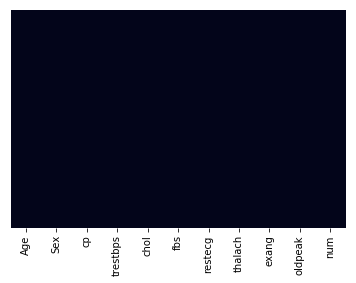

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)#As we see all the null values are drop

In [19]:
df.isnull().sum()#no more null values

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [20]:
df.head(3)

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0


In [21]:
'''pd.get_dummies(df['restecg'])#just to convert all the the string data to numbers

restcg=pd.get_dummies(df['restecg'],drop_first=True)#.....It remove the first column if 2nd and 3rd column is enough to judge the class of 1st column
restcg.head(5)'''

"pd.get_dummies(df['restecg'])#just to convert all the the string data to numbers\n\nrestcg=pd.get_dummies(df['restecg'],drop_first=True)#.....It remove the first column if 2nd and 3rd column is enough to judge the class of 1st column\nrestcg.head(5)"

In [22]:
df.head(5)

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0


Train-Test-split

In [23]:
x=df.drop("num",axis=1)
y=df['num']

In [24]:
x.shape

(342, 10)

In [25]:
X = df.iloc[:, 0:10].values 
y = df.iloc[:, 10].values 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.17, random_state=2)

In [28]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [29]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression(random_state=0)

In [32]:
model.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
print(X_train)

[[-0.91748923 -0.94615292]
 [ 0.39620548  0.85302186]
 [ 1.30731435 -1.99504167]
 [-2.43640137 -0.7521167 ]
 [ 1.20832738 -1.63293626]
 [-0.54133705  0.00705315]
 [ 2.33410924  0.80384884]
 [-1.30683488 -2.17790946]
 [ 1.57232968  2.26591058]
 [-1.00817122  0.76503293]
 [-2.24695729  0.06928045]
 [ 1.98314823 -0.82425113]
 [ 1.66605277  2.74283402]
 [ 1.81572725  0.02085161]
 [ 1.70837652 -1.40578176]
 [-1.43187212  0.15483885]
 [-1.42872758  1.23254409]
 [ 2.96023497 -2.10052089]
 [-2.01792378  0.73533568]
 [ 2.26325948  0.65959999]
 [-2.93130017 -0.04488506]
 [-3.53390415  0.63734637]
 [ 1.73170148 -1.60298378]
 [-1.27773298 -1.01062982]
 [-1.52642864 -0.84734052]
 [-0.04558021 -0.44574559]
 [ 1.23143717  1.27993147]
 [ 0.84648851  2.57622061]
 [-0.26087487 -1.73202782]
 [-3.08442314  0.61495951]
 [ 0.72039034  0.44688634]
 [ 0.01868786 -2.62477663]
 [ 0.73454842 -0.29486876]
 [-0.52784064  0.17740254]
 [-0.29806553 -0.14668066]
 [-1.34070149  0.16290195]
 [ 3.74507961  0.90545124]
 

In [34]:
prediction=model.predict(X_test)
print(prediction)

[0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0]


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.83      0.73      0.78        26

   micro avg       0.81      0.81      0.81        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.81      0.81      0.81        59



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,prediction)

array([[29,  4],
       [ 7, 19]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,prediction)

0.8135593220338984

In [41]:
prediction

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


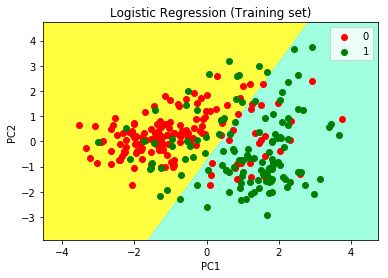

In [42]:
# Predicting the training set 
# result through scatter plot  
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show() 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


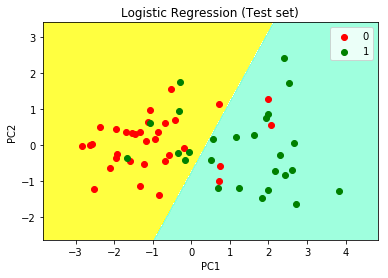

In [43]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_test, y_test 

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), 
X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

# title for scatter plot 
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 

# show scatter plot 
plt.show() 


In [3]:
%matplotlib notebook
title = 'pca analysis'
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)


RuntimeError: Requested MovieWriter (ffmpeg) not available